The dataset is part of a monitoring project for the Musquash Marine Protected Area (MPA) in NB, Canada where marine ecosystems are protected. The goal of this project is to understand the underwater environment better, especially the organisms and sediments found on the seabed (the ocean floor).\

**Infauna:** tiny organisms living in the ocean floor, like worms and clams\
**Sediments:** like ocean soil, the grains of sand, mud, and organic material that make up the ocean floor. 

Why This Matters

1. Monitoring marine health: If something changes in the number of organisms or sediment quality, it could indicate environmental problems like pollution or climate change.
2. Protecting biodiversity: Learning about the creatures living in the area helps ensure the ecosystem remains balanced and thriving.

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [2]:
df1 = pd.read_csv('Musquash_MPA_Benthos_Infauna.csv', encoding='latin1')
df2 = pd.read_csv('Musquash_MPA_Sediment_Grain_Size.csv', encoding='latin1')
df3 = pd.read_csv('Musquash_MPA_Sediment_Loss_Ignition.csv', encoding='latin1')
df4 = pd.read_csv('Musquash_MPA_Set_Data.csv', encoding='latin1')

df_dict = pd.read_csv('Data_dictionary.csv', encoding='latin1')

In [3]:
df_dict.head()

,Layer / Couche,Field / Champ,Field Description,Description du champ
0,Musquash_MPA_Benthos_Infauna,OBJECTID,ArcGIS Field,Identifiant ArcGIS
1,Musquash_MPA_Benthos_Infauna,Shape,ArcGIS Field,Identifiant ArcGIS
2,Musquash_MPA_Benthos_Infauna,set_id,Unique set identifier (yyyy.mm.station),Identificateur unique de l'ensemble (aaaa.mm.s...
3,Musquash_MPA_Benthos_Infauna,lat,Latitude in decimal degrees,Latitude en degrés décimaux
4,Musquash_MPA_Benthos_Infauna,lon,Longitude in decimal degrees,Longitude en degrés décimaux


In [4]:
df1.head()

,set_id,lat,lon,station,strata_strate,day_jour,month_mois,year_année,season_saison,scientificName_Nom_scientifique,scientificNameID_Identifiant_du_nom_scientifique,total_count,tot_wt_g
0,2010.02.001,45.186283,-66.257067,1,channel,18,2,2010,Winter,Manayunkia aestuarina,urn:lsid:marinespecies.org:taxname:130926,4.0,6407.0
1,2010.02.001,45.186283,-66.257067,1,channel,18,2,2010,Winter,Alitta virens,urn:lsid:marinespecies.org:taxname:234851,1.0,6407.0
2,2010.02.001,45.186283,-66.257067,1,channel,18,2,2010,Winter,Nephtys ciliata,urn:lsid:marinespecies.org:taxname:130356,1.0,6407.0
3,2010.02.001,45.186283,-66.257067,1,channel,18,2,2010,Winter,Micronephthys cornuta,urn:lsid:marinespecies.org:taxname:869884,4.0,6407.0
4,2010.02.001,45.186283,-66.257067,1,channel,18,2,2010,Winter,Nephtys incisa,urn:lsid:marinespecies.org:taxname:130362,1.0,6407.0


#### df1 - infauna information (biomass)
include information of station(location), strata, time(year,season), basic information about infauna (name, amount, total wet weight)\
total_count: Total number of individuals observed for all replicates at each station.\
tot_wt_g: Combined total wet weight of all grab replicates per station in grams.

In [5]:
df2.head()

,set_id,lat,lon,day_jour,month_mois,year_année,station,replicate_réplicat,cont_wt_g,gross_wet_wt_g,...,sieve_wt_250um_g,sieve_wt_125um_g,sieve_wt_64um_g,gross_wt_250um_g,gross_wt_125um_g,gross_wt_64um_g,net_dry_250um_g,net_dry_125um_g,net_dry_64um_g,silt_frac_g
0,2011.09.001,45.140750,-66.260217,1,9,2011,1,a,6.2778,34.0235,...,83.7504,79.5634,77.7643,83.7923,79.9604,81.1508,0.0419,0.3970,3.3865,23.8357
1,2011.09.002,45.142633,-66.261833,1,9,2011,2,a,6.3088,33.1497,...,80.2814,80.0605,78.4858,80.7942,80.9008,81.5616,0.5128,0.8403,3.0758,22.3488
2,2011.09.003,45.146367,-66.248683,1,9,2011,3,a,6.3356,27.2129,...,85.0923,81.5106,78.7343,85.1063,81.6408,81.0848,0.0140,0.1302,2.3505,18.3550
3,2011.09.004,45.146483,-66.246083,1,9,2011,4,a,6.3538,32.9757,...,83.5714,80.8549,78.4480,83.5742,80.9838,84.1922,0.0028,0.1289,5.7442,20.7136
4,2011.09.005,45.146633,-66.243450,1,9,2011,5,a,6.3375,38.4750,...,81.3784,79.0289,79.0378,81.7750,79.6175,94.4968,0.3966,0.5886,15.4590,15.6635


#### df2 - sediment composition and grain size distribution (habitat conditions)
1. Grain Weight Measurements:\
cont_wt_g: Weight of the dry container.\
gross_wet_wt_g: Wet weight of the grain size subsample and container.\
gross_dry_wt_g: Dry weight of the grain size subsample and container.\
net_dry_wt_g: Net dry weight of the grain size subsample.

2. Grain Size Fractions:\
Weights for different sieve fractions (250 μm, 125 μm, 64 μm), including:\
sieve_wt_*: Weight of sieves.\
gross_wt_*: Gross weight of sieves with fractions.\
net_dry_*: Net dry weight of fractions.

3. Fine Sediment Fraction:\
silt_frac_g: Weight of sediment smaller than 64 μm.

In [6]:
df3.head()

,set_id,lat,lon,day_jour,month_mois,year_année,station,replicate_réplicat,cont_g,air_cont_g,oven_cont_g,net_dry_wt_g,ash_1_g,ash_2_g,perc_loss_ash_1__,perc_loss_ash_2__,tot_perc_loss__,comments
0,2011.09.001,45.140750,-66.260217,1,9,2011,1,a,16.101,18.698,18.697,2.596,18.610,18.528,3.351310,3.158706,6.510015,NaN
1,2011.09.001,45.140750,-66.260217,1,9,2011,1,b,8.257,10.735,10.735,2.478,10.654,10.567,3.268765,3.510896,6.779661,NaN
2,2011.09.001,45.140750,-66.260217,1,9,2011,1,c,15.093,17.500,17.499,2.406,17.429,17.338,2.909393,3.782211,6.691604,NaN
3,2011.09.001,45.140750,-66.260217,1,9,2011,1,d,14.283,16.734,16.732,2.449,16.668,16.567,2.613312,4.124132,6.737444,NaN
4,2011.09.002,45.142633,-66.261833,1,9,2011,2,a,13.454,16.024,16.022,2.568,15.972,15.932,1.947040,1.557632,3.504673,NaN


#### df3 - sediment loss-on-ignition (a method used to analyze the organic and mineral content of sediment samples.)
1. Crucible Weight Measurements:\
cont_g: Weight of the dry, clean crucible.\
air_cont_g: Weight of air-dried sediment sample with crucible.\
oven_cont_g: Weight of oven-dried sediment sample with crucible.

2. Ash Content:\
ash_1_g: Weight of sediment after organic content removal at 475°C for 5 hours.\
ash_2_g: Weight of sediment after additional ignition at 950°C for 3 hours.

3. Percentage Loss:\
perc_loss_ash_1__: Percentage loss of organic matter during the first ignition phase.\
perc_loss_ash_2__: Percentage loss of organic matter during the second ignition phase.\
tot_perc_loss__: Total percentage loss of organic matter across both phases.

In [7]:
df4.head()

,set_id,day_jour,month_mois,year_année,station,lat,lon,depth_m_profondeur_m,time_heure,strata_strate,season_saison,wt_a_g,wt_b_g,wt_c_g,tot_wt_g,comments_commentaires
0,2010.02.001,18,2,2010,1,45.186283,-66.257067,8.1,14:05,channel,Winter,1899.8,2224.5,2282.7,6407.0,NaN
1,2010.02.002,18,2,2010,2,45.185333,-66.254833,11.0,14:10,channel,Winter,2085.8,2113.1,1997.5,6196.4,NaN
2,2010.02.003,18,2,2010,3,45.184100,-66.252367,9.5,14:14,channel,Winter,1552.3,1783.5,971.2,4307.0,NaN
3,2010.02.004,18,2,2010,4,45.183017,-66.248600,3.5,14:18,channel,Winter,1914.2,1958.2,2074.9,5947.3,NaN
4,2010.02.005,18,2,2010,5,45.181283,-66.245317,3.6,14:21,channel,Winter,2207.6,1982.8,2340.8,6531.2,NaN


df4 is mainly about sampling conditions and is largely overlapping with previous 3, so not very useful except for:\
depth_m_profondeur_m: Water depth (in meters) recorded during sampling.

#### Potential research questions:
1. How do environmental factors (e.g., sediment grain size, season, depth) influence the biomass of infauna in the Musquash Marine Protected Area?

2. How does infaunal biodiversity vary with sediment composition, and what factors explain the observed variability?

3. We can also choose sediment as the target variable so comes question like -- What are the key predictors of sediment organic content across different stations? BUT i suggest we use biomass as the target features as they seem to be more meaningful.

Column: total_count
  Missing values: 0 out of 7901
  Mean: 57.92
  Standard deviation: 355.75
  Min: 0.0
  Max: 14880.0
  Cardinality: 457
Column: tot_wt_g
  Missing values: 0 out of 7901
  Mean: 3369.29
  Standard deviation: 1647.25
  Min: 186.0
  Max: 7474.0
  Cardinality: 414


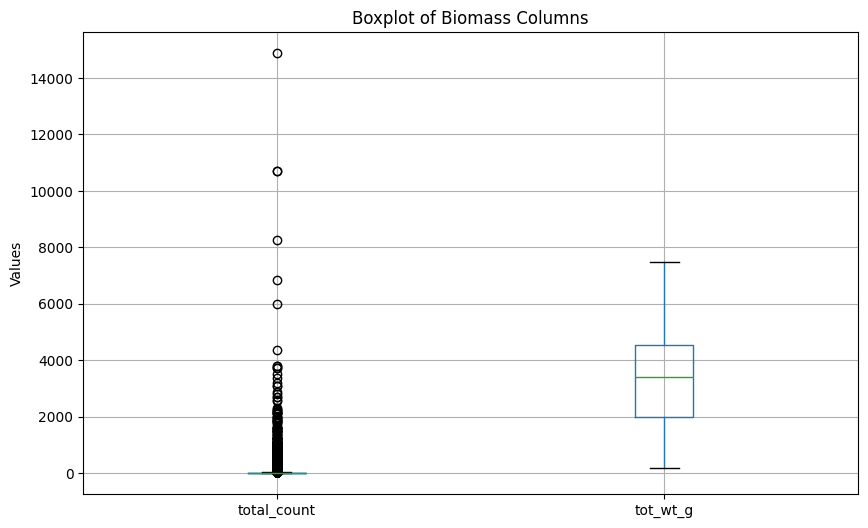

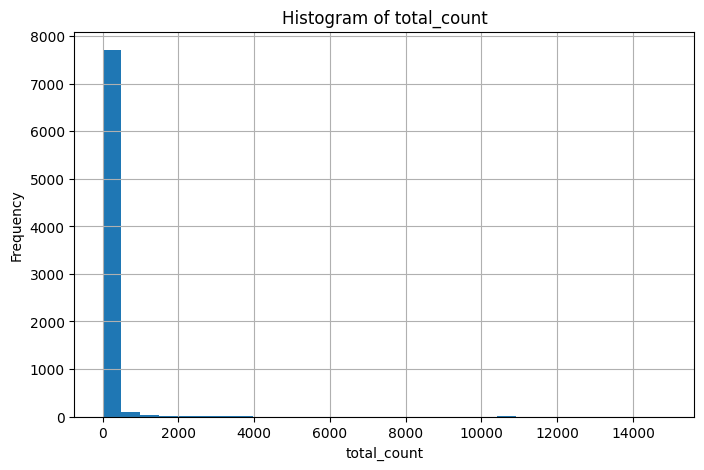

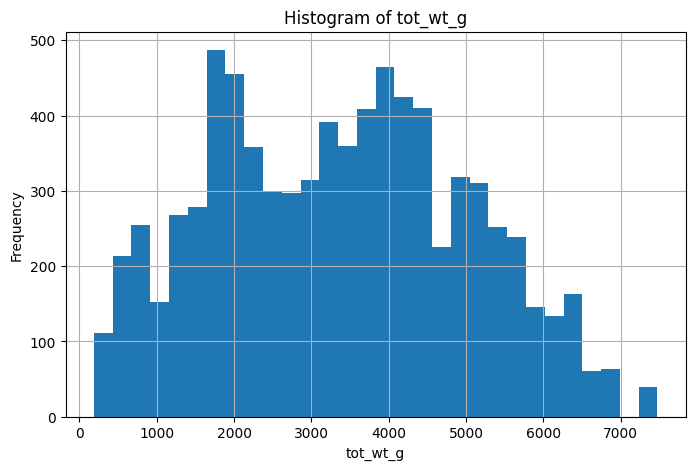

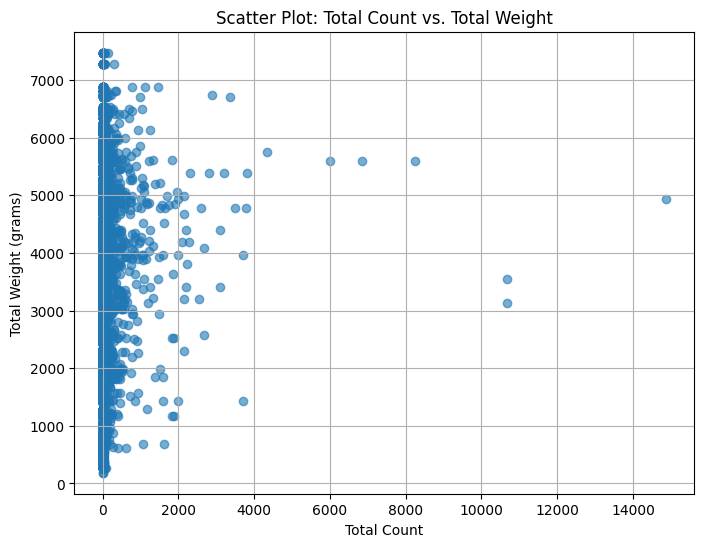

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

biomass_cols = ['total_count', 'tot_wt_g']

# Exploratory Data Analysis
for col in biomass_cols:
    print(f"Column: {col}")
    
    # Basic statistics
    print(f"  Missing values: {df1[col].isna().sum()} out of {len(df1)}")
    print(f"  Mean: {df1[col].mean():.2f}")
    print(f"  Standard deviation: {df1[col].std():.2f}")
    print(f"  Min: {df1[col].min()}")
    print(f"  Max: {df1[col].max()}")
    print(f"  Cardinality: {df1[col].nunique()}")
    print("="*40)

# Boxplot for visualization
plt.figure(figsize=(10, 6))
df1[biomass_cols].boxplot()
plt.title('Boxplot of Biomass Columns')
plt.ylabel('Values')
plt.show()

# Histograms for distribution
for col in biomass_cols:
    plt.figure(figsize=(8, 5))
    df1[col].hist(bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Scatter plot to check relationships between the two columns
plt.figure(figsize=(8, 6))
plt.scatter(df1['total_count'], df1['tot_wt_g'], alpha=0.6)
plt.title('Scatter Plot: Total Count vs. Total Weight')
plt.xlabel('Total Count')
plt.ylabel('Total Weight (grams)')
plt.grid(True)
plt.show()

Original number of rows: 7901
Number of rows after removing outliers: 6719


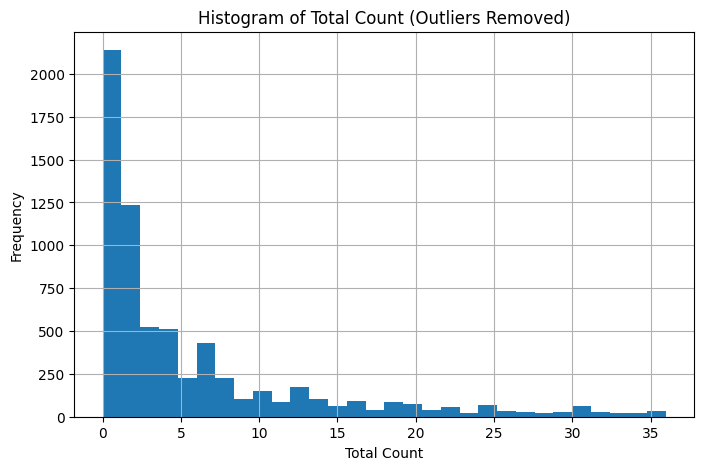

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate the first and third quartiles (Q1 and Q3) for 'total_count'
Q1 = df1['total_count'].quantile(0.25)  # First quartile (25th percentile)
Q3 = df1['total_count'].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range (IQR)

# Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df1_no_outliers = df1[(df1['total_count'] >= lower_bound) & (df1['total_count'] <= upper_bound)]

# Print the result of the filtering
print(f"Original number of rows: {len(df1)}")
print(f"Number of rows after removing outliers: {len(df1_no_outliers)}")

# Generate a histogram for 'total_count' after removing outliers
plt.figure(figsize=(8, 5))
df1_no_outliers['total_count'].hist(bins=30)
plt.title('Histogram of Total Count (Outliers Removed)')
plt.xlabel('Total Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()